# Pre-processing Aggregated Water Use data for WaDE upload.
Purpose:  To pre-process the aggregated water use data into one master file for simple DataFrame creation and extraction

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/California/WaterUse_AggregatedArea" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/California/WaterUse_AggregatedArea


## Input Source Data

In [3]:
# Input File - CA-DWR-WaterBalance-Level2-DP-1000-2002-2016-DAUCO
inputFile ="RawInputData/CA-DWR-WaterBalance-Level2-DP-1000-2002-2016-DAUCO.zip"
df_dau = pd.read_csv(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in df_dau:
    df_dau['WaDEUUID'] = "dau" + df_dau.index.astype(str)
    df_dau.to_csv('RawInputData/CA-DWR-WaterBalance-Level2-DP-1000-2002-2016-DAUCO.zip', compression=dict(method='zip', archive_name='DAU.csv'), index=False)

print(len(df_dau))
df_dau.head()

3014000


,CategoryA,CategoryC,Year,DAU,DAU_NAME,HR_CODE,HR_NAME,PA,Longitude,Latitude,KAcreFt,CategoryD,CategoryB,WaDEUUID
0,Agriculture,Applied Water,2002,DAU04827,Pressure,3,Central Coast,301,-121.63771,36.63942,105.50000,AG1,1,dau0
1,Agriculture,Applied Water - Groundwater Recharge,2002,DAU04827,Pressure,3,Central Coast,301,-121.63771,36.63942,0.00000,AG2,2,dau1
2,Agriculture,Conveyance Deep Percolation,2002,DAU04827,Pressure,3,Central Coast,301,-121.63771,36.63942,0.00000,AG22,22,dau2
3,Agriculture,Conveyance Deep Percolation to Mexico,2002,DAU04827,Pressure,3,Central Coast,301,-121.63771,36.63942,0.00000,AG18F,18f,dau3
4,Agriculture,Conveyance Deep Percolation to Nevada,2002,DAU04827,Pressure,3,Central Coast,301,-121.63771,36.63942,0.00000,AG18E,18e,dau4


In [4]:
# Input File - CA-DWR-WaterBalance-Level2-DP-1000-2002-2016-HR
inputFile ="RawInputData/CA-DWR-WaterBalance-Level2-DP-1000-2002-2016-HR.zip"
df_hr = pd.read_csv(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in df_hr:
    df_hr['WaDEUUID'] = "hr" + df_hr.index.astype(str)
    df_hr.to_csv('RawInputData/CA-DWR-WaterBalance-Level2-DP-1000-2002-2016-HR.zip', compression=dict(method='zip', archive_name='HR.csv'), index=False)

print(len(df_hr))
df_hr.head()

42610


,Year,CategoryC,CategoryD,HR,CategoryA,KAcreFt,WaDEUUID
0,2002,Applied Water,AG1,Central Coast,Agriculture,1175.60000,hr0
1,2002,Return Flow to Salt Sink,AG10A,Central Coast,Agriculture,83.70000,hr1
2,2002,Return Flow for Delta Outflow,AG10B,Central Coast,Agriculture,0.00000,hr2
3,2002,Return Flow to Developed Supply (Other DAUCO w...,AG11A,Central Coast,Agriculture,0.00000,hr3
4,2002,Return Flow to Developed Supply (Other PA),AG11B,Central Coast,Agriculture,0.00000,hr4


In [5]:
# Input File - CA-DWR-WaterBalance-Level2-DP-1000-2002-2016-PA
inputFile ="RawInputData/CA-DWR-WaterBalance-Level2-DP-1000-2002-2016-PA.zip"
df_pa = pd.read_csv(inputFile, encoding = "ISO-8859-1").replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in df_pa:
    df_pa['WaDEUUID'] = "pa" + df_pa.index.astype(str)
    df_pa.to_csv('RawInputData/CA-DWR-WaterBalance-Level2-DP-1000-2002-2016-PA.zip', compression=dict(method='zip', archive_name='PA.csv'), index=False)

print(len(df_pa))
df_pa.head()

238616


,Year,CategoryC,CategoryD,PA,CategoryA,KAcreFt,WaDEUUID
0,2002,Applied Water,AG1,101,Agriculture,664.40000,pa0
1,2002,Return Flow to Salt Sink,AG10A,101,Agriculture,9.30000,pa1
2,2002,Return Flow for Delta Outflow,AG10B,101,Agriculture,0.00000,pa2
3,2002,Return Flow to Developed Supply (Other DAUCO w...,AG11A,101,Agriculture,2.60000,pa3
4,2002,Return Flow to Developed Supply (Other PA),AG11B,101,Agriculture,0.00000,pa4


In [6]:
# Input File: WaDECADAU.shp
fileInput = "RawInputData/shapefiles/WaDECADAU.zip"
gdf_dau = gpd.read_file(fileInput).replace(np.nan, "")
print(len(gdf_dau))
gdf_dau.head(1)

520


,HR_Code,PA_Num,Shape_Leng,Shape_Le_1,RU_ID,Shape_Le_2,Shape_Area,geometry
0,1.00000,101.00000,2.96297,2.96297,DAU00125,2.96297,0.33027,"POLYGON ((-121.08710 41.99514, -120.70108 41.9..."


In [7]:
# Input File: Hydrologic_Regions.shp
fileInput = "RawInputData/shapefiles/Hydrologic_Regions.zip"
gdf_hr = gpd.read_file(fileInput).replace(np.nan, "")
print(len(gdf_hr))
gdf_hr.head(1)

10


,OBJECTID,HR_NAME,RU_ID,Shape_Leng,Shape_Area,geometry
0,13,Central Coast,3,15.90003,2.91428,"POLYGON ((-122.11808 37.25528, -122.11795 37.2..."


In [8]:
# Input File: Water_Plan_Planning_Areas.shp
fileInput = "RawInputData/shapefiles/Water_Plan_Planning_Areas.zip"
gdf_pa = gpd.read_file(fileInput).replace(np.nan, "")
print(len(gdf_pa))
gdf_pa.head(1)

59


,OBJECTID,PA_NO,Shape_Leng,Shape_Area,geometry
0,12,1001,9.38796,1.70894,"POLYGON ((-115.16056 35.35811, -115.16038 35.3..."


## Clean Data
- We only want the Applied Water Use and Depletion values.

In [9]:
# DAU
df_dau = df_dau[df_dau['CategoryC'].isin(['Applied Water Use', 'Depletion']) ].reset_index(drop=True)
df_dau = df_dau.sort_values(by=['Year', 'CategoryC', 'DAU', 'CategoryA', 'KAcreFt'], )
print(len(df_dau))
print(df_dau['CategoryC'].unique())
df_dau.head(1)

86832
['Applied Water Use' 'Depletion']


,CategoryA,CategoryC,Year,DAU,DAU_NAME,HR_CODE,HR_NAME,PA,Longitude,Latitude,KAcreFt,CategoryD,CategoryB,WaDEUUID
132,Agriculture,Applied Water Use,2002,DAU00125,Lost River,1,North Coast,101,-121.06010,41.79382,132.30000,AWUAG,Computed,dau2004


In [10]:
# assign HR ID value

HydrologicRegionIDdict = {
"North Coast" : "1",
"San Francisco Bay" : "2",
"Central Coast" : "3",
"South Coast" : "4",
"Sacramento River" : "5",
"San Joaquin River" : "6",
"Tulare Lake" : "7",
"North Lahontan" : "8",
"South Lahontan" : "9",
"Colorado River" : "10"}
    
def AssignHrIdFunc(colrowValue):
    if colrowValue == '' or pd.isnull(colrowValue):
        outList = 'NULL'
    else:
        String1 = colrowValue.strip()
        try:
            outList = HydrologicRegionIDdict[String1]
        except:
            outList = 'NULL'
    return outList


df_hr['in_ReportingUnitNativeID'] = df_hr.apply(lambda row: AssignHrIdFunc(row['HR']), axis=1)
df_hr['in_ReportingUnitNativeID'].value_counts()

in_ReportingUnitNativeID
3     4261
10    4261
1     4261
8     4261
5     4261
2     4261
6     4261
4     4261
9     4261
7     4261
Name: count, dtype: int64

In [11]:
# HR
df_hr = df_hr[df_hr['CategoryC'].isin(['Applied Water Use', 'Depletion']) ].reset_index(drop=True)
df_hr = df_hr.sort_values(by=['Year', 'CategoryC', 'HR', 'CategoryA', 'KAcreFt'], )
print(len(df_hr))
print(df_hr['CategoryC'].unique())
df_hr.head(1)

1800
['Applied Water Use' 'Depletion']


,Year,CategoryC,CategoryD,HR,CategoryA,KAcreFt,WaDEUUID,in_ReportingUnitNativeID
0,2002,Applied Water Use,AWUAG,Central Coast,Agriculture,1175.60000,hr36,3


In [12]:
# PA
df_pa = df_pa[df_pa['CategoryC'].isin(['Applied Water Use', 'Depletion']) ].reset_index(drop=True)
df_pa = df_pa.sort_values(by=['Year', 'CategoryC', 'PA', 'CategoryA', 'KAcreFt'], )
print(len(df_pa))
print(df_pa['CategoryC'].unique())
df_pa.head(1)

10080
['Applied Water Use' 'Depletion']


,Year,CategoryC,CategoryD,PA,CategoryA,KAcreFt,WaDEUUID
0,2002,Applied Water Use,AWUAG,101,Agriculture,664.40000,pa36


## WaDE Data

In [13]:
# DAU
# Transfer input data to WaDE specific output

# create dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = df_dau['WaDEUUID']

# Method Info
df['in_MethodUUID'] = "CAwuag_M1"

# Variable Info
df['in_VariableSpecificUUID'] = "" # determine below
df['in_AggregationIntervalUnitCV'] = "Annual"
df['in_VariableCV'] = df_dau['CategoryC']
df['in_VariableSpecificCV'] = "" # determine below

# Organization Info
df['in_OrganizationUUID'] = "CAwuag_O1"

# Water Source
df['in_Geometry'] = ""
df['in_GNISFeatureNameCV'] = ""
df['in_WaterQualityIndicatorCV'] = "Fresh"
df["in_WaterSourceName"] = ""
df['in_WaterSourceNativeID'] = ""
df["in_WaterSourceTypeCV"] = "Surface and Groundwater"

# ReportingUnits Info
df['in_EPSGCodeCV'] = 4326
df['in_ReportingUnitName'] = df_dau['DAU_NAME']
df['in_ReportingUnitNativeID'] = df_dau['DAU']
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Detailed Analysis Units by County"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "CA"

# AggregatedAmounts Info
df['in_AllocationCropDutyAmount'] = ""
df['in_Amount'] = df_dau['KAcreFt']
df['in_BeneficialUseCategory'] = df_dau['CategoryA']
df['in_CommunityWaterSupplySystem'] = ""
df['in_CropTypeCV'] = ""
df['in_CustomerTypeCV'] = ""
df['in_DataPublicationDate'] = ""
df['in_DataPublicationDOI'] = ""
df['in_InterbasinTransferFromID'] = ""
df['in_InterbasinTransferToID'] = ""
df['in_IrrigatedAcreage'] = ""
df['in_IrrigationMethodCV'] = ""
df['in_PopulationServed'] = ""
df['in_PowerGeneratedGWh'] = ""
df['in_PowerType'] = ""
df['in_PrimaryUseCategoryCV'] = ""
df['in_ReportYearCV'] = df_dau['Year']
df['in_SDWISIdentifierCV'] = ""
df['in_TimeframeEnd'] = df_dau['Year'].astype(str)  + "/12/31"
df['in_TimeframeStart'] = df_dau['Year'].astype(str) + "/01/01"

outdf_dau = df.copy()
outdf_dau = outdf_dau.drop_duplicates().reset_index(drop=True)
print(len(outdf_dau))
outdf_dau.head(5)

86832


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_AggregationIntervalUnitCV,in_VariableCV,in_VariableSpecificCV,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_AllocationCropDutyAmount,in_Amount,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_InterbasinTransferFromID,in_InterbasinTransferToID,in_IrrigatedAcreage,in_IrrigationMethodCV,in_PopulationServed,in_PowerGeneratedGWh,in_PowerType,in_PrimaryUseCategoryCV,in_ReportYearCV,in_SDWISIdentifierCV,in_TimeframeEnd,in_TimeframeStart
0,dau2004,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,Lost River,DAU00125,,Detailed Analysis Units by County,,CA,,132.30000,Agriculture,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
1,dau2028,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,Lost River,DAU00125,,Detailed Analysis Units by County,,CA,,0.00000,Instream Flow Requirements,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
2,dau2020,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,Lost River,DAU00125,,Detailed Analysis Units by County,,CA,,111.40000,Managed Wetlands,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
3,dau2036,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,Lost River,DAU00125,,Detailed Analysis Units by County,,CA,,0.00000,Required Delta Outflow,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
4,dau2012,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,Lost River,DAU00125,,Detailed Analysis Units by County,,CA,,0.30000,Urban,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01


In [14]:
# HR
# Transfer input data to WaDE specific output

# create dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = df_hr['WaDEUUID']

# Method Info
df['in_MethodUUID'] = "CAwuag_M1"

# Variable Info
df['in_VariableSpecificUUID'] = "" # determine below
df['in_AggregationIntervalUnitCV'] = "Annual"
df['in_VariableCV'] = df_hr['CategoryC']
df['in_VariableSpecificCV'] = "" # determine below

# Organization Info
df['in_OrganizationUUID'] = "CAwuag_O1"

# Water Source
df['in_Geometry'] = ""
df['in_GNISFeatureNameCV'] = ""
df['in_WaterQualityIndicatorCV'] = "Fresh"
df["in_WaterSourceName"] = ""
df['in_WaterSourceNativeID'] = ""
df["in_WaterSourceTypeCV"] = "Surface and Groundwater"

# ReportingUnits Info
df['in_EPSGCodeCV'] = 4326
df['in_ReportingUnitName'] = df_hr['HR']
df['in_ReportingUnitNativeID'] = df_hr['in_ReportingUnitNativeID']
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Hydrologic Region"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "CA"

# AggregatedAmounts Info
df['in_AllocationCropDutyAmount'] = ""
df['in_Amount'] = df_hr['KAcreFt']
df['in_BeneficialUseCategory'] = df_hr['CategoryA']
df['in_CommunityWaterSupplySystem'] = ""
df['in_CropTypeCV'] = ""
df['in_CustomerTypeCV'] = ""
df['in_DataPublicationDate'] = ""
df['in_DataPublicationDOI'] = ""
df['in_InterbasinTransferFromID'] = ""
df['in_InterbasinTransferToID'] = ""
df['in_IrrigatedAcreage'] = ""
df['in_IrrigationMethodCV'] = ""
df['in_PopulationServed'] = ""
df['in_PowerGeneratedGWh'] = ""
df['in_PowerType'] = ""
df['in_PrimaryUseCategoryCV'] = ""
df['in_ReportYearCV'] = df_hr['Year']
df['in_SDWISIdentifierCV'] = ""
df['in_TimeframeEnd'] = df_hr['Year'].astype(str)  + "/12/31"
df['in_TimeframeStart'] = df_hr['Year'].astype(str) + "/01/01"

outdf_hr = df.copy()
outdf_hr = outdf_hr.drop_duplicates().reset_index(drop=True)
print(len(outdf_hr))
outdf_hr.head(5)

1800


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_AggregationIntervalUnitCV,in_VariableCV,in_VariableSpecificCV,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_AllocationCropDutyAmount,in_Amount,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_InterbasinTransferFromID,in_InterbasinTransferToID,in_IrrigatedAcreage,in_IrrigationMethodCV,in_PopulationServed,in_PowerGeneratedGWh,in_PowerType,in_PrimaryUseCategoryCV,in_ReportYearCV,in_SDWISIdentifierCV,in_TimeframeEnd,in_TimeframeStart
0,hr36,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,Central Coast,3,,Hydrologic Region,,CA,,1175.60000,Agriculture,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
1,hr44,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,Central Coast,3,,Hydrologic Region,,CA,,10.70000,Instream Flow Requirements,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
2,hr56,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,Central Coast,3,,Hydrologic Region,,CA,,0.50000,Managed Wetlands,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
3,hr98,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,Central Coast,3,,Hydrologic Region,,CA,,0.00000,Required Delta Outflow,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
4,hr104,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,Central Coast,3,,Hydrologic Region,,CA,,291.80000,Urban,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01


In [15]:
# PA
# Transfer input data to WaDE specific output

# create dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = df_pa['WaDEUUID']

# Method Info
df['in_MethodUUID'] = "CAwuag_M1"

# Variable Info
df['in_VariableSpecificUUID'] = "" # determine below
df['in_AggregationIntervalUnitCV'] = "Annual"
df['in_VariableCV'] = df_pa['CategoryC']
df['in_VariableSpecificCV'] = "" # determine below

# Organization Info
df['in_OrganizationUUID'] = "CAwuag_O1"

# Water Source
df['in_Geometry'] = ""
df['in_GNISFeatureNameCV'] = ""
df['in_WaterQualityIndicatorCV'] = "Fresh"
df["in_WaterSourceName"] = ""
df['in_WaterSourceNativeID'] = ""
df["in_WaterSourceTypeCV"] = "Surface and Groundwater"

# ReportingUnits Info
df['in_EPSGCodeCV'] = 4326
df['in_ReportingUnitName'] = df_pa['PA']
df['in_ReportingUnitNativeID'] = df_pa['PA']
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Planning Area"
df['in_ReportingUnitUpdateDate'] = ""
df['in_StateCV'] = "CA"

# AggregatedAmounts Info
df['in_AllocationCropDutyAmount'] = ""
df['in_Amount'] = df_pa['KAcreFt']
df['in_BeneficialUseCategory'] = df_pa['CategoryA']
df['in_CommunityWaterSupplySystem'] = ""
df['in_CropTypeCV'] = ""
df['in_CustomerTypeCV'] = ""
df['in_DataPublicationDate'] = ""
df['in_DataPublicationDOI'] = ""
df['in_InterbasinTransferFromID'] = ""
df['in_InterbasinTransferToID'] = ""
df['in_IrrigatedAcreage'] = ""
df['in_IrrigationMethodCV'] = ""
df['in_PopulationServed'] = ""
df['in_PowerGeneratedGWh'] = ""
df['in_PowerType'] = ""
df['in_PrimaryUseCategoryCV'] = ""
df['in_ReportYearCV'] = df_pa['Year']
df['in_SDWISIdentifierCV'] = ""
df['in_TimeframeEnd'] = df_pa['Year'].astype(str)  + "/12/31"
df['in_TimeframeStart'] = df_pa['Year'].astype(str) + "/01/01"

outdf_pa = df.copy()
outdf_pa = outdf_pa.drop_duplicates().reset_index(drop=True)
print(len(outdf_pa))
outdf_pa.head(5)

10080


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_AggregationIntervalUnitCV,in_VariableCV,in_VariableSpecificCV,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_AllocationCropDutyAmount,in_Amount,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_InterbasinTransferFromID,in_InterbasinTransferToID,in_IrrigatedAcreage,in_IrrigationMethodCV,in_PopulationServed,in_PowerGeneratedGWh,in_PowerType,in_PrimaryUseCategoryCV,in_ReportYearCV,in_SDWISIdentifierCV,in_TimeframeEnd,in_TimeframeStart
0,pa36,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,101,101,,Planning Area,,CA,,664.40000,Agriculture,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
1,pa44,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,101,101,,Planning Area,,CA,,0.00000,Instream Flow Requirements,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
2,pa56,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,101,101,,Planning Area,,CA,,343.30000,Managed Wetlands,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
3,pa98,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,101,101,,Planning Area,,CA,,0.00000,Required Delta Outflow,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01
4,pa104,CAwuag_M1,,Annual,Applied Water Use,,CAwuag_O1,,,Fresh,,,Surface and Groundwater,4326,101,101,,Planning Area,,CA,,11.40000,Urban,,,,,,,,,,,,,,2002,,2002/12/31,2002/01/01


## Concatenate Data (if needed).

In [16]:
# Concatenate dataframes

frames = [outdf_dau, outdf_hr, outdf_pa]  # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

98712


## Clean Data / Data Types

In [17]:
# Clean name entries of spcial characters
def removeSpecialCharsFunc(Val):
    Val = str(Val)
    Val = re.sub("[$@&.;/\)(-]", "", Val).title().replace("  ", " ").strip().rstrip(',')
    return Val

<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:4: SyntaxWarning: invalid escape sequence '\)'
C:\Users\rjame\AppData\Local\Temp\ipykernel_18572\1085762661.py:4: SyntaxWarning: invalid escape sequence '\)'
  Val = re.sub("[$@&.;/\)(-]", "", Val).title().replace("  ", " ").strip().rstrip(',')


In [18]:
outdf['in_WaterSourceName'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_WaterSourceName']), axis=1)
outdf['in_WaterSourceName'].unique()

array([''], dtype=object)

In [19]:
outdf['in_WaterSourceTypeCV'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_WaterSourceTypeCV']), axis=1)
outdf['in_WaterSourceTypeCV'].unique()

array(['Surface And Groundwater'], dtype=object)

In [20]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Lost River', 'Butte Valley', 'Scott Valley', 'Shasta Valley',
       'Trinity', 'Lower Klamath', 'Smith River Basin', 'Bignoyoten Mile',
       'Navarrogarcia', 'Gualala', 'Lower Eel', 'Van Duzen',
       'South Fork Eel', 'Upper Eel', 'Mattolebear', 'Redwood Creek',
       'Madtrinidad', 'Eureka Plain', 'Lower Russian', 'Santa Rosa',
       'Bodega', 'West Marin', 'Napa', 'Solano', 'San Mateo Coast',
       'South Bay Peninsula', 'San Jose', 'Livermore', 'Walnut Creek',
       'Oakland', 'Pressure', 'East Side', 'Forebay', 'Upper Valley',
       'Monterey Peninsula', 'Arroyo Seco Northern', 'Gabilan Range',
       'Lockwood', 'Carmel River', 'Santa Lucia Range', 'Bolsa Nueva',
       'Watsonville', 'Santa Cruz', 'Santa Cruz Mountains',
       'South Santa Clara Valley', 'Pachecosanta Ana Creeks',
       'San Benito River', 'Upper Salinas', 'North Coast',
       'San Luis Obispo', 'Arroyo Grande', 'Carrizo Plain',
       'Santa Maria Valleyslo', 'Santa Maria Valleysb',
       '

In [21]:
outdf['in_ReportingUnitTypeCV'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_ReportingUnitTypeCV']), axis=1)
outdf['in_ReportingUnitTypeCV'].unique()

array(['Detailed Analysis Units By County', 'Hydrologic Region',
       'Planning Area'], dtype=object)

In [22]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [23]:
outdf['in_WaterSourceName'] = outdf.apply(lambda row: ensureEmptyString(row['in_WaterSourceName']), axis=1)
outdf['in_WaterSourceName'].unique()

array([''], dtype=object)

In [24]:
outdf['in_WaterSourceTypeCV'] = outdf.apply(lambda row: ensureEmptyString(row['in_WaterSourceTypeCV']), axis=1)
outdf['in_WaterSourceTypeCV'].unique()

array(['Surface And Groundwater'], dtype=object)

In [25]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Lost River', 'Butte Valley', 'Scott Valley', 'Shasta Valley',
       'Trinity', 'Lower Klamath', 'Smith River Basin', 'Bignoyoten Mile',
       'Navarrogarcia', 'Gualala', 'Lower Eel', 'Van Duzen',
       'South Fork Eel', 'Upper Eel', 'Mattolebear', 'Redwood Creek',
       'Madtrinidad', 'Eureka Plain', 'Lower Russian', 'Santa Rosa',
       'Bodega', 'West Marin', 'Napa', 'Solano', 'San Mateo Coast',
       'South Bay Peninsula', 'San Jose', 'Livermore', 'Walnut Creek',
       'Oakland', 'Pressure', 'East Side', 'Forebay', 'Upper Valley',
       'Monterey Peninsula', 'Arroyo Seco Northern', 'Gabilan Range',
       'Lockwood', 'Carmel River', 'Santa Lucia Range', 'Bolsa Nueva',
       'Watsonville', 'Santa Cruz', 'Santa Cruz Mountains',
       'South Santa Clara Valley', 'Pachecosanta Ana Creeks',
       'San Benito River', 'Upper Salinas', 'North Coast',
       'San Luis Obispo', 'Arroyo Grande', 'Carrizo Plain',
       'Santa Maria Valleyslo', 'Santa Maria Valleysb',
       '

In [26]:
outdf['in_ReportingUnitTypeCV'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitTypeCV']), axis=1)
outdf['in_ReportingUnitTypeCV'].unique()

array(['Detailed Analysis Units By County', 'Hydrologic Region',
       'Planning Area'], dtype=object)

In [27]:
outdf['in_BeneficialUseCategory'] = outdf.apply(lambda row: ensureEmptyString(row['in_BeneficialUseCategory']), axis=1)
uniqueList = list(set([i.strip() for i in ','.join(outdf['in_BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['Agriculture',
 'Instream Flow Requirements',
 'Managed Wetlands',
 'Required Delta Outflow',
 'Urban',
 'Wild and Scenic River']

In [28]:
# Convert TimeframeEnd to YYYY-MM-DD format.
outdf['in_TimeframeEnd'] = pd.to_datetime(outdf['in_TimeframeEnd'], utc=True, errors = 'coerce').fillna("")
outdf['in_TimeframeEnd'] = pd.to_datetime(outdf["in_TimeframeEnd"].dt.strftime('%m/%d/%Y'))
outdf['in_TimeframeEnd'].unique()

<DatetimeArray>
['2002-12-31 00:00:00', '2003-12-31 00:00:00', '2004-12-31 00:00:00',
 '2005-12-31 00:00:00', '2006-12-31 00:00:00', '2007-12-31 00:00:00',
 '2008-12-31 00:00:00', '2009-12-31 00:00:00', '2010-12-31 00:00:00',
 '2011-12-31 00:00:00', '2012-12-31 00:00:00', '2013-12-31 00:00:00',
 '2014-12-31 00:00:00', '2015-12-31 00:00:00', '2016-12-31 00:00:00']
Length: 15, dtype: datetime64[ns]

In [29]:
# Convert TimeframeStart to YYYY-MM-DD format.
outdf['in_TimeframeStart'] = pd.to_datetime(outdf['in_TimeframeStart'], utc=True, errors = 'coerce').fillna("")
outdf['in_TimeframeStart'] = pd.to_datetime(outdf["in_TimeframeStart"].dt.strftime('%m/%d/%Y'))
outdf['in_TimeframeStart'].unique()

<DatetimeArray>
['2002-01-01 00:00:00', '2003-01-01 00:00:00', '2004-01-01 00:00:00',
 '2005-01-01 00:00:00', '2006-01-01 00:00:00', '2007-01-01 00:00:00',
 '2008-01-01 00:00:00', '2009-01-01 00:00:00', '2010-01-01 00:00:00',
 '2011-01-01 00:00:00', '2012-01-01 00:00:00', '2013-01-01 00:00:00',
 '2014-01-01 00:00:00', '2015-01-01 00:00:00', '2016-01-01 00:00:00']
Length: 15, dtype: datetime64[ns]

In [30]:
# extract year out
# outdf['in_ReportYearCV'] = pd.to_datetime(outdf['in_ReportYearCV'], utc=True, errors = 'coerce').fillna("")
# outdf['in_ReportYearCV'] = pd.to_datetime(outdf["in_ReportYearCV"].dt.strftime('%m/%d/%Y'))
# outdf['in_ReportYearCV'] = outdf['in_ReportYearCV'].dt.year
outdf['in_ReportYearCV'] = outdf['in_ReportYearCV'].fillna(0).astype(int)
outdf['in_ReportYearCV'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [31]:
# Ensure Amount entry is either numireic or blank, no 0 entries
outdf['in_Amount'] = pd.to_numeric(outdf['in_Amount'], errors='coerce').round(2).replace(0,"").fillna("")
outdf['in_Amount'].unique()

array([132.3, '', 111.4, ..., 817.9, 724.9, 1030.2], dtype=object)

In [32]:
# Creating WaDE Custom VariableSpecificCV
# ----------------------------------------------------------------------------------------------------
def createVariableSpecificCV(inV, inAIU, inPU, inWST):
    inV = str(inV).strip()
    inAIU = str(inAIU).strip()
    inPU = str(inPU).strip().title()
    inWST = str(inWST).strip()
    outString = inV + "_" + inAIU + "_" + inPU + "_" + inWST
    return outString

outdf['in_VariableSpecificCV'] = outdf.apply(lambda row: createVariableSpecificCV(row['in_VariableCV'], 
                                                                                  row['in_AggregationIntervalUnitCV'],
                                                                                  row['in_BeneficialUseCategory'],
                                                                                  row['in_WaterSourceTypeCV']), axis=1)
outdf['in_VariableSpecificCV'].unique()

array(['Applied Water Use_Annual_Agriculture_Surface And Groundwater',
       'Applied Water Use_Annual_Instream Flow Requirements_Surface And Groundwater',
       'Applied Water Use_Annual_Managed Wetlands_Surface And Groundwater',
       'Applied Water Use_Annual_Required Delta Outflow_Surface And Groundwater',
       'Applied Water Use_Annual_Urban_Surface And Groundwater',
       'Applied Water Use_Annual_Wild And Scenic River_Surface And Groundwater',
       'Depletion_Annual_Agriculture_Surface And Groundwater',
       'Depletion_Annual_Instream Flow Requirements_Surface And Groundwater',
       'Depletion_Annual_Managed Wetlands_Surface And Groundwater',
       'Depletion_Annual_Required Delta Outflow_Surface And Groundwater',
       'Depletion_Annual_Urban_Surface And Groundwater',
       'Depletion_Annual_Wild And Scenic River_Surface And Groundwater'],
      dtype=object)

In [33]:
# Creating WaDE Custom water source native ID for easy water source identification
# use unique WaterSourceName and WaterSourceType values
# ----------------------------------------------------------------------------------------------------

# Create temp in_WaterSourceNativeID dataframe of unique water source.
def assignIdValueFunc(colRowValue):
    string1 = str(colRowValue)
    outstring = "wadeId" + string1
    return outstring

dfTempID = pd.DataFrame()
dfTempID['in_WaterSourceName'] = outdf['in_WaterSourceName'].astype(str).str.strip()
dfTempID['in_WaterSourceTypeCV'] = outdf['in_WaterSourceTypeCV'].astype(str).str.strip()
dfTempID = dfTempID.drop_duplicates()

dfTempCount = pd.DataFrame(index=dfTempID.index)
dfTempCount["Count"] = range(1, len(dfTempCount.index) + 1)
dfTempID['in_WaterSourceNativeID'] = dfTempCount.apply(lambda row: assignIdValueFunc(row['Count']), axis=1)
dfTempID['linkKey'] = dfTempID['in_WaterSourceName'].astype(str) + dfTempID['in_WaterSourceTypeCV'].astype(str)
IdDict = pd.Series(dfTempID.in_WaterSourceNativeID.values, index=dfTempID.linkKey.astype(str)).to_dict()
# ----------------------------------------------------------------------------------------------------

# Retreive WaDE Custom site native ID
def retrieveIdValueFunc(checkVal, valA, valB):
    checkVal = str(checkVal).strip()
    if checkVal == "":
        linkKeyVal = str(valA).strip() + str(valB).strip()
        outString = IdDict[linkKeyVal]
    else:
        outString = checkVal
    return outString

outdf['in_WaterSourceNativeID'] = outdf.apply(lambda row: retrieveIdValueFunc(row['in_WaterSourceNativeID'], 
                                                                              row['in_WaterSourceName'], row['in_WaterSourceTypeCV']), axis=1)
outdf['in_WaterSourceNativeID'].unique()

array(['wadeId1'], dtype=object)

## Shapefile Data
- For attaching geometry to csv inputs.

### DAU

In [34]:
# Input
inputFile = "RawInputData/shapefiles/WaDECADAU.zip"
gdf_dau = gpd.read_file(inputFile, crs="EPSG:4326")
print(len(gdf_dau))
gdf_dau.head(1)

520


,HR_Code,PA_Num,Shape_Leng,Shape_Le_1,RU_ID,Shape_Le_2,Shape_Area,geometry
0,1.00000,101.00000,2.96297,2.96297,DAU00125,2.96297,0.33027,"POLYGON ((-121.08710 41.99514, -120.70108 41.9..."


<Axes: >

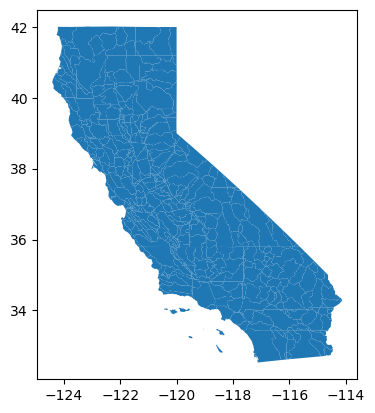

In [35]:
gdf_dau.plot()

In [36]:
# Output
columnsList = ['in_ReportingUnitNativeID', 'geometry']
outgdf_dau = pd.DataFrame(columns=columnsList)
outgdf_dau['in_ReportingUnitNativeID'] = gdf_dau['RU_ID'] # chould match above 'in_ReportingUnitNativeID' if file not copied
outgdf_dau['geometry'] = gdf_dau['geometry']
outgdf_dau = outgdf_dau.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
print(len(outgdf_dau))
outgdf_dau.head(1)

520


,in_ReportingUnitNativeID,geometry
0,DAU00125,"POLYGON ((-121.08710 41.99514, -120.70108 41.9..."


### HR

In [37]:
# Shapefile input - HR
inputFile = "RawInputData/shapefiles/Hydrologic_Regions.zip"
gdf_hr = gpd.read_file(inputFile, crs="EPSG:4326")
print(len(gdf_hr))
gdf_hr.head(1)

10


,OBJECTID,HR_NAME,RU_ID,Shape_Leng,Shape_Area,geometry
0,13,Central Coast,3,15.90003,2.91428,"POLYGON ((-122.11808 37.25528, -122.11795 37.2..."


<Axes: >

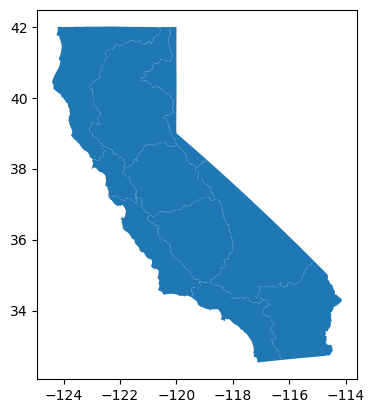

In [38]:
gdf_hr.plot()

In [39]:
# Output
columnsList = ['in_ReportingUnitNativeID', 'geometry']
outgdf_hr = pd.DataFrame(columns=columnsList)
outgdf_hr['in_ReportingUnitNativeID'] = gdf_hr['RU_ID'] # chould match above 'in_ReportingUnitNativeID' if file not copied
outgdf_hr['geometry'] = gdf_hr['geometry']
outgdf_hr = outgdf_hr.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
print(len(outgdf_hr))
outgdf_hr.head(1)

10


,in_ReportingUnitNativeID,geometry
0,3,"POLYGON ((-122.11808 37.25528, -122.11795 37.2..."


### PA

In [40]:
# Shapefile input - PA
inputFile = "RawInputData/shapefiles/Water_Plan_Planning_Areas.zip"
gdf_pa = gpd.read_file(inputFile, crs="EPSG:4326")
print(len(gdf_pa))
gdf_pa.head(1)

59


,OBJECTID,PA_NO,Shape_Leng,Shape_Area,geometry
0,12,1001,9.38796,1.70894,"POLYGON ((-115.16056 35.35811, -115.16038 35.3..."


<Axes: >

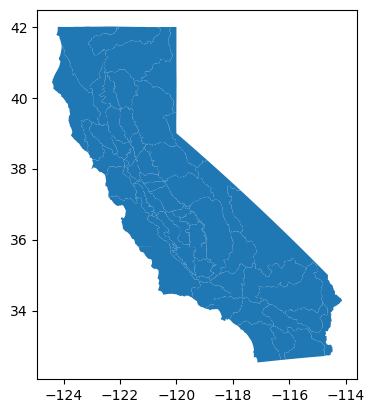

In [41]:
gdf_pa.plot()

In [42]:
# Output
columnsList = ['in_ReportingUnitNativeID', 'geometry']
outgdf_pa = pd.DataFrame(columns=columnsList)
outgdf_pa['in_ReportingUnitNativeID'] = gdf_pa['PA_NO'] # chould match above 'in_ReportingUnitNativeID' if file not copied
outgdf_pa['geometry'] = gdf_pa['geometry']
outgdf_pa = outgdf_pa.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
print(len(outgdf_pa))
outgdf_pa.head(1)

59


,in_ReportingUnitNativeID,geometry
0,1001,"POLYGON ((-115.16056 35.35811, -115.16038 35.3..."


### Shape Output 

In [43]:
# Concatenate shp datafraes together.
frames = [outgdf_dau, outgdf_hr, outgdf_pa]
outshape = pd.concat(frames).reset_index(drop=True)
print(len(outshape))
outshape.head(1)

589


,in_ReportingUnitNativeID,geometry
0,DAU00125,"POLYGON ((-121.08710 41.99514, -120.70108 41.9..."


# Export Data

In [44]:
outdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98712 entries, 0 to 98711
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   WaDEUUID                        98712 non-null  object        
 1   in_MethodUUID                   98712 non-null  object        
 2   in_VariableSpecificUUID         98712 non-null  object        
 3   in_AggregationIntervalUnitCV    98712 non-null  object        
 4   in_VariableCV                   98712 non-null  object        
 5   in_VariableSpecificCV           98712 non-null  object        
 6   in_OrganizationUUID             98712 non-null  object        
 7   in_Geometry                     98712 non-null  object        
 8   in_GNISFeatureNameCV            98712 non-null  object        
 9   in_WaterQualityIndicatorCV      98712 non-null  object        
 10  in_WaterSourceName              98712 non-null  object        
 11  in

In [45]:
outdf

,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_AggregationIntervalUnitCV,in_VariableCV,in_VariableSpecificCV,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_AllocationCropDutyAmount,in_Amount,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_InterbasinTransferFromID,in_InterbasinTransferToID,in_IrrigatedAcreage,in_IrrigationMethodCV,in_PopulationServed,in_PowerGeneratedGWh,in_PowerType,in_PrimaryUseCategoryCV,in_ReportYearCV,in_SDWISIdentifierCV,in_TimeframeEnd,in_TimeframeStart
0,dau2004,CAwuag_M1,,Annual,Applied Water Use,Applied Water Use_Annual_Agriculture_Surface A...,CAwuag_O1,,,Fresh,,wadeId1,Surface And Groundwater,4326,Lost River,DAU00125,,Detailed Analysis Units By County,,CA,,132.30000,Agriculture,,,,,,,,,,,,,,2002,,2002-12-31,2002-01-01
1,dau2028,CAwuag_M1,,Annual,Applied Water Use,Applied Water Use_Annual_Instream Flow Require...,CAwuag_O1,,,Fresh,,wadeId1,Surface And Groundwater,4326,Lost River,DAU00125,,Detailed Analysis Units By County,,CA,,,Instream Flow Requirements,,,,,,,,,,,,,,2002,,2002-12-31,2002-01-01
2,dau2020,CAwuag_M1,,Annual,Applied Water Use,Applied Water Use_Annual_Managed Wetlands_Surf...,CAwuag_O1,,,Fresh,,wadeId1,Surface And Groundwater,4326,Lost River,DAU00125,,Detailed Analysis Units By County,,CA,,111.40000,Managed Wetlands,,,,,,,,,,,,,,2002,,2002-12-31,2002-01-01
3,dau2036,CAwuag_M1,,Annual,Applied Water Use,Applied Water Use_Annual_Required Delta Outflo...,CAwuag_O1,,,Fresh,,wadeId1,Surface And Groundwater,4326,Lost River,DAU00125,,Detailed Analysis Units By County,,CA,,,Required Delta Outflow,,,,,,,,,,,,,,2002,,2002-12-31,2002-01-01
4,dau2012,CAwuag_M1,,Annual,Applied Water Use,Applied Water Use_Annual_Urban_Surface And Gro...,CAwuag_O1,,,Fresh,,wadeId1,Surface And Groundwater,4326,Lost River,DAU00125,,Detailed Analysis Units By County,,CA,,0.30000,Urban,,,,,,,,,,,,,,2002,,2002-12-31,2002-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98707,pa232051,CAwuag_M1,,Annual,Depletion,Depletion_Annual_Instream Flow Requirements_Su...,CAwuag_O1,,,Fresh,,wadeId1,Surface And Groundwater,4326,1006,1006,,Planning Area,,CA,,,Instream Flow Requirements,,,,,,,,,,,,,,2016,,2016-12-31,2016-01-01
98708,pa232064,CAwuag_M1,,Annual,Depletion,Depletion_Annual_Managed Wetlands_Surface And ...,CAwuag_O1,,,Fresh,,wadeId1,Surface And Groundwater,4326,1006,1006,,Planning Area,,CA,,45.10000,Managed Wetlands,,,,,,,,,,,,,,2016,,2016-12-31,2016-01-01
98709,pa232105,CAwuag_M1,,Annual,Depletion,Depletion_Annual_Required Delta Outflow_Surfac...,CAwuag_O1,,,Fresh,,wadeId1,Surface And Groundwater,4326,1006,1006,,Planning Area,,CA,,,Required Delta Outflow,,,,,,,,,,,,,,2016,,2016-12-31,2016-01-01
98710,pa232112,CAwuag_M1,,Annual,Depletion,Depletion_Annual_Urban_Surface And Groundwater,CAwuag_O1,,,Fresh,,wadeId1,Surface And Groundwater,4326,1006,1006,,Planning Area,,CA,,56.20000,Urban,,,,,,,,,,,,,,2016,,2016-12-31,2016-01-01


In [46]:
# Export the output dataframe
outdf.to_csv('RawInputData/Pwuag_caMain.zip', compression=dict(method='zip', archive_name='Pwuag_caMain.csv'), index=False)   # The output, save as a zip
outshape.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.

In [47]:
# dftemp = outshape.copy()
# dftemp = dftemp[['in_ReportingUnitNativeID']].drop_duplicates()
# dftemp.to_csv('RawInputData/dftemp.zip', compression=dict(method='zip', archive_name='dftemp.csv'), index=False)  # The output geometry.